# Filter

What is done here

Better example? More ideas, tasks?

In [1]:
import numpy as num
import matplotlib.pyplot as plt
import pandas as pd
from scipy import signal

In [2]:
file = 'data/hourly_data_modified.txt' 
#file = 'data/NY_climate_2010_modified.csv'

data = pd.read_csv(file)

In [23]:
tempcol = 'TT_TU'
#tempcol = 'HLY-TEMP-NORMAL'
timecol = 'seconds'

numyears = 5
idxyear = int(24*365 * numyears)

xdata = data[timecol][:idxyear]
ydata = data[tempcol][:idxyear]

## Sampling interval
dt = 1 / (24*365) # in years

df = 1 / dt  # Sampling frequency

nyquist = df / 2

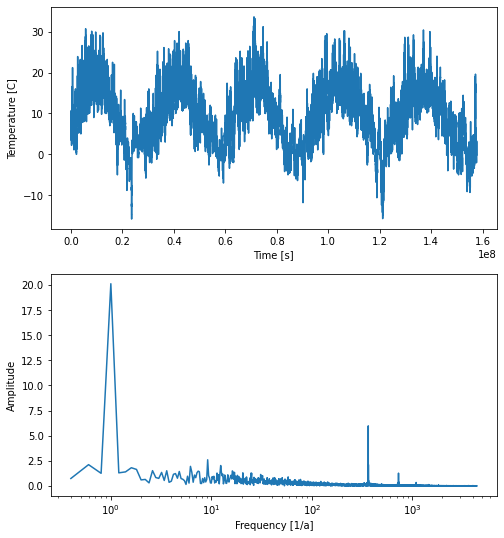

In [24]:
amps = abs(num.fft.rfft(ydata)) * dt
freqs = num.fft.rfftfreq(len(ydata), d=dt)

plt.figure(figsize=(8, 9))
ax = plt.subplot(2, 1, 1)
ax.plot(xdata, ydata)
plt.xlabel('Time [s]')
plt.ylabel('Temperature [C]')

ax = plt.subplot(2, 1, 2)
#ax.plot(freqs, amps)
ax.semilogx(freqs[2:], amps[2:])
ax.set_xlabel('Frequency [1/a]')
ax.set_ylabel('Amplitude')

plt.show()

# Filtering

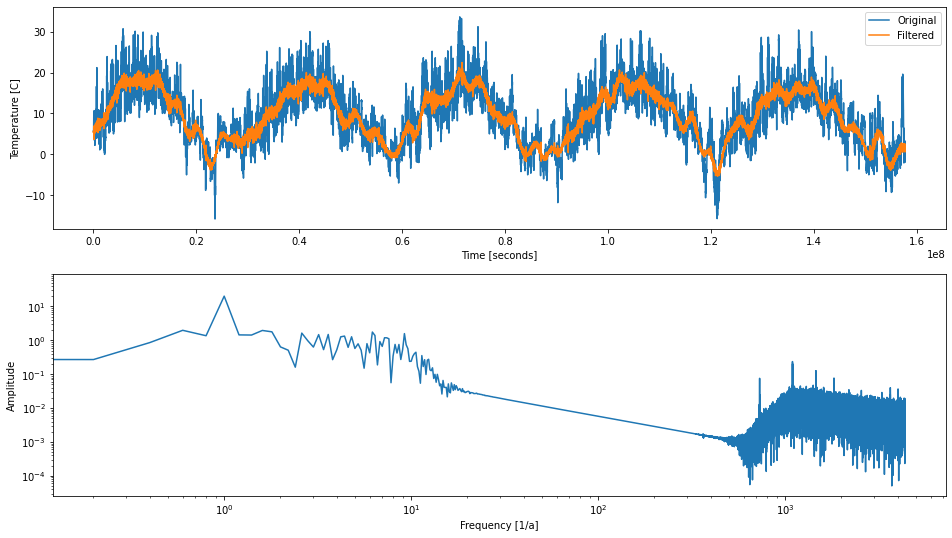

In [29]:
# Filter requirements.
filterfreq1 = 10
filterfreq2 = 1000
order = 4

# One gotcha is that Wn is a fraction of the Nyquist frequency (half the sampling frequency).
# So if the sampling rate is 1000Hz and you want a cutoff of 250Hz, you should use Wn=0.5.
ws1 = filterfreq1 / nyquist
ws2 = filterfreq2 / nyquist

#b, a = sos = signal.butter(order, ws1, 'lowpass')
#b, a = sos = signal.butter(order, ws1, 'highpass')
#b, a = sos = signal.butter(order, [ws1, ws2], 'bandpass')
b, a = sos = signal.butter(order, [ws1, ws2], 'bandstop')

w, h = signal.freqz(b, a, int((1/filterfreq1) * 1000)) # last argument just to optimize the display quality

yfilt = signal.filtfilt(b, a, ydata)

amps = abs(num.fft.rfft(yfilt)) * dt
freqs = num.fft.rfftfreq(len(yfilt), d=dt)

plt.figure(figsize=(16, 9))
ax = plt.subplot(2, 1, 1)
ax.plot(xdata, ydata, zorder=-1, label='Original')
ax.plot(xdata, yfilt, label='Filtered')
ax.set_xlabel('Time [seconds]')
ax.set_ylabel('Temperature [C]')
ax.legend()

ax = plt.subplot(2, 1, 2)
#ax.plot(freqs, amps)
ax.loglog(freqs, amps)
ax.set_xlabel('Frequency [1/a]')
ax.set_ylabel('Amplitude')


plt.show()